In [1]:
import numpy as np
import matplotlib.pyplot as plt

# MAC0460/5832 - Lista 4: SVM - MNIST

### Data de Entrega: 23h55m do dia XX/12/2018

##### Classificação de dígitos
Os dataset para esta tarefa é uma adaptação do disponível na competição do kaggle de reconhecimento de dígitos (https://www.kaggle.com/c/digit-recognizer) e está disponível em http://vision.ime.usp.br/~caiomr/mac0460_5832/train_svm.csv.gz. O dataset está sob a licença Creative Commons Attribution-Share Alike 3.0 license (https://creativecommons.org/licenses/by-sa/3.0/). O dataset foi zipado, e apenas os dígitos 5 e 6 foram mantidos. Cada linha (amostra) do arquivo contém 257 colunas: a primeira informa o label da amostra (0 para o dígito 5, 1 para o dígito 6) e as outras 256 são os valores dos pixels da imagem (16 x 16) que representa o dígito.

Note que esse dataset difere do usado no EP3: as imagens sofreram pequenas rotações e translações aleatórias, além de terem sido escalonadas para o tamanho 16x16. Veja também que pode ser necessário realizar algum tipo de normalização para realizar um treinamento efetivo com SVM. Para auxiliar na normalização dos dados, consultem o seguinte link: http://scikit-learn.org/stable/modules/preprocessing.html. 

Q1. Use SVM para classificar os dígitos 5 e 6. Utilize as funções do scikit learn (http://scikit-learn.org/, http://scikit-learn.org/stable/modules/svm.html) para realizar o treinamento.

Teste os kernels linear e RBF da seguinte maneira:
1. Escolha aleatoriamente 932 amostras para formarem o conjunto de teste.
2. Com as 7000 amostras restantes, utilize validação cruzada (com número de folds K = 5) para escolher os parâmetros do seu classificador, isto é: C (peso da *soft margin*) para o kernel linear; C e gamma para o kernel RBF.
3. Plote a curva experimental de aprendizado para o melhor SVM com kernel linear e o melhor SVM com kernel RBF escolhidos por validação cruzada. Use as 932 amostras do conjunto de teste para estimar $E_{out}$. Comente sobre o resultado.

In [2]:
data = np.genfromtxt('data/train_svm.csv', delimiter=',')
print(data.shape)

(7932, 257)


Label:  1


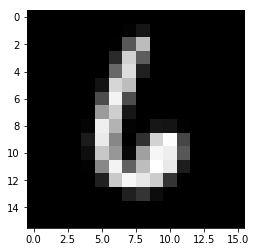

Label:  0


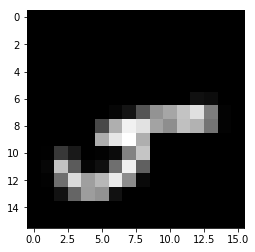

Label:  1


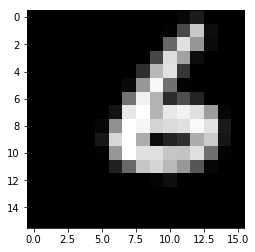

Label:  0


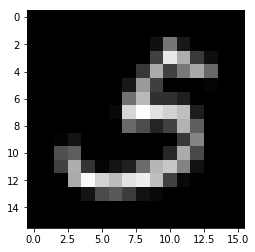

In [3]:
sample = data[0]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

sample = data[1]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

sample = data[20]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

sample = data[25]
print("Label: ", int(sample[0]))
plt.imshow(sample[1:].reshape((16, 16)), cmap='gray')
plt.show()

In [18]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
y = data[:, 0]
X = data[:, 1:]

print("Target shape {}, input shape {}".format(y.shape, X.shape))

Target shape (7932,), input shape (7932, 256)


In [6]:
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=932)

print("Trainset size {}, testset size {}".format(X_train.shape[0], X_test.shape[0]))

Trainset size 7000, testset size 932


In [8]:
def grid_search(X, y, model, parameters_dict, performance_metric):
    """
    Performs a grid search using X, y as data, model as a model,
    a parameters_dict as a parameters grid and performance_metric as
    the performance metric to be optimized.
    
    returns the best estimator.
    """
    scoring_fnc = make_scorer(performance_metric)

    grid = GridSearchCV(model,
                        parameters_dict,
                        scoring=scoring_fnc,
                        cv=5,
                        verbose=1,
                        n_jobs=-1)

    grid = grid.fit(X, y)

    return grid.best_estimator_

In [13]:
linear_parameters_grid = {"kernel": ["linear"], 
                          "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

rbf_parameters_grid = {"kernel": ["rbf"], 
                       "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                       "gamma": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

model = SVC()

In [14]:
best_linear_estimator = grid_search(X_train, y_train, model, linear_parameters_grid, f1_score)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done   8 out of  35 | elapsed:   14.9s remaining:   50.2s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  4.7min finished


In [15]:
best_rbf_estimator = grid_search(X_train, y_train, model, rbf_parameters_grid, f1_score)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:  8.8min finished


In [16]:
best_linear_estimator

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
best_rbf_estimator

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [44]:
def plot_experimental_learning_curve(train_sizes, train_errors, test_errors):
    plt.figure(figsize=(12, 6))
    plt.plot([s for s in train_sizes], train_errors, label="Ein")
    plt.plot([s for s in train_sizes], test_errors, label="Eout")
    plt.legend()
    plt.xlabel("Training samples")
    plt.ylabel("Error")
    plt.title("Experimental learning curve")
    plt.show()
    
def learning_curve(X_train, y_train, X_test, y_test, model, performance_function, n=10):
    data_fraction = np.linspace(0.1, 1, n)
    
    train_performance = []
    test_performance = []
    data_size = [int(len(X_train) * frac) for frac in data_fraction]
    
    for i in range(n):
        sample_X_train, sample_X_test, sample_y_train, sample_y_test = train_test_split(X_train,
                                                                                        y_train, 
                                                                                        train_size=data_size[i]-1)
        
        model.fit(sample_X_train, sample_y_train)
        
        y_pred = model.predict(sample_X_train)
        train_performance.append(1 - performance_function(sample_y_train, y_pred))
        
        y_pred = model.predict(X_test)
        test_performance.append(1 - performance_function(y_test, y_pred))

        
        
    return data_size, train_performance, test_performance

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


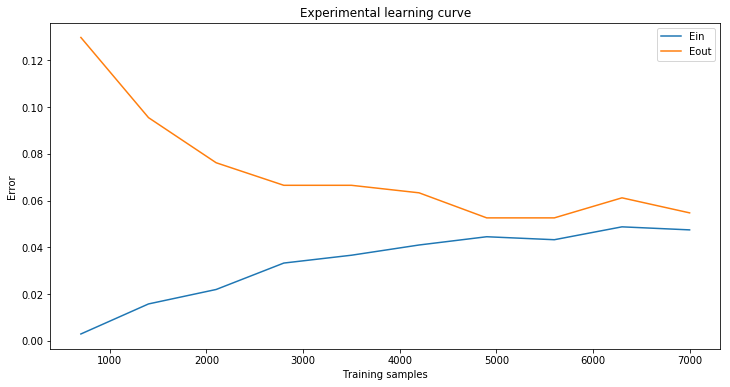

In [45]:
plot_experimental_learning_curve(*learning_curve(X_train,
                                                 y_train, 
                                                 X_test, 
                                                 y_test, 
                                                 best_linear_estimator, 
                                                 accuracy_score, 
                                                 n=10))

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


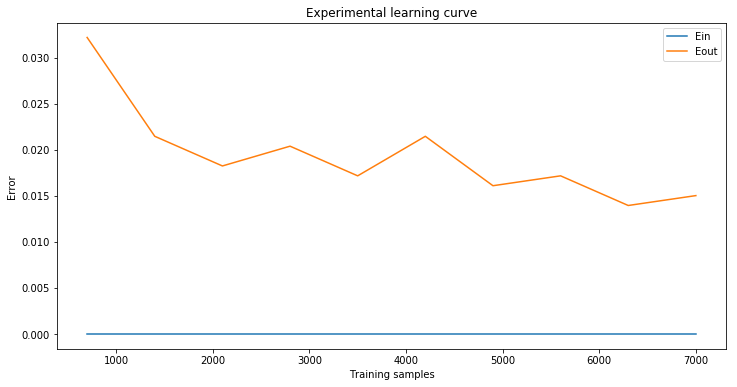

In [46]:
plot_experimental_learning_curve(*learning_curve(X_train,
                                                y_train, 
                                                X_test, 
                                                y_test, 
                                                best_rbf_estimator, 
                                                accuracy_score, 
                                                n=10))

### Comentários

Os dois gráficos ficaram com as curvas em um formato esperado: Ein vai aumentando (mesmo que seja muito pouco no caso do RBF) e Eout vai diminuindo. 

No caso linear a convergência ficou mais evidente, porém, o erro também ficou maior. 

No caso do RBF, a distância entre Ein e Eout está relativamente maior e dá a entender que seriam precisos muito mais dados para covnergir, o que faz sentido, pois o Ein muito pequeno indica que a complexidade do modelo é alta.

Ou seja, em termos de generalização, se formos falar sobre a distância entre Ein e Eout, o linear está generalizando melhor. Porém, mesmo que a diferença entre Ein e Eout seja relativamente maior no caso do RBF, o Eout é menor, que é o que nos interessa, então ele seria o melhor modelo para ser escolhido neste caso.